# Exercise 2

Calculate average numbers of goals per one match in each country league. Draw a plot visualising the results.

- prepare a new column with total goals 
- then group by country and aggregate total goals using mean aggregate function

In [4]:
import pandas as pd

In [5]:
url = 'https://github.com/piotrgradzinski/dap_20230114/raw/main/day_6_pgg/matches.csv'
matches = pd.read_csv(url, parse_dates=['date'])
matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3
...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,FC St. Gallen,FC Thun,2015-09-22,2015/2016,1,0
25975,Switzerland,Switzerland Super League,FC Vaduz,FC Luzern,2015-09-23,2015/2016,1,2
25976,Switzerland,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2015-09-23,2015/2016,2,0
25977,Switzerland,Switzerland Super League,Lugano,FC Zürich,2015-09-22,2015/2016,0,0


In [6]:
matches['total_goals'] = matches.home_team_goal + matches.away_team_goal
matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,total_goals
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1,2
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0,5
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3,4
...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,FC St. Gallen,FC Thun,2015-09-22,2015/2016,1,0,1
25975,Switzerland,Switzerland Super League,FC Vaduz,FC Luzern,2015-09-23,2015/2016,1,2,3
25976,Switzerland,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2015-09-23,2015/2016,2,0,2
25977,Switzerland,Switzerland Super League,Lugano,FC Zürich,2015-09-22,2015/2016,0,0,0


In [7]:
goals_per_country = matches.groupby('country').agg({
    'total_goals': 'mean'
})
goals_per_country

,total_goals
country,
Belgium,2.801505
England,2.710526
France,2.443092
Germany,2.901552
Italy,2.616838
Netherlands,3.080882
Poland,2.425000
Portugal,2.534600
Scotland,2.633772


In [18]:
goals_per_country.sort_values('total_goals', ascending=False).head(5)

,total_goals
country,
Netherlands,3.080882
Switzerland,2.929677
Germany,2.901552
Belgium,2.801505
Spain,2.767105


In [24]:
goals_per_country.round(1).sort_values('total_goals', ascending=False)

,total_goals
country,
Netherlands,3.1
Germany,2.9
Switzerland,2.9
Belgium,2.8
Spain,2.8
England,2.7
Italy,2.6
Scotland,2.6
Portugal,2.5


If I want to have top 2 countries using head will cause a problem, because we have 2 countries with second result

In [26]:
goals_per_country.round(1).sort_values('total_goals', ascending=False).head(2)

,total_goals
country,
Netherlands,3.1
Germany,2.9


To fix that problem we can use [`nlargest()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html#) function with `keep='all'` argument. When using this function we don't have to order the data, it will be done automatically.

In [30]:
goals_per_country.round(1).nlargest(2, 'total_goals', keep='all')

,total_goals
country,
Netherlands,3.1
Germany,2.9
Switzerland,2.9


<AxesSubplot:ylabel='country'>

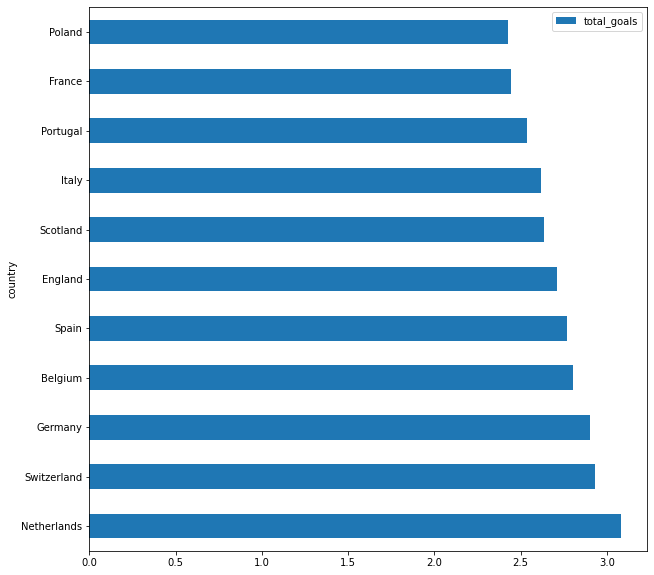

In [14]:
goals_per_country.sort_values('total_goals', ascending=False).plot(kind='barh', figsize=(10,10))

<AxesSubplot:title={'center':'Average number of goals per match (top leagues in Europe)'}, xlabel='country'>

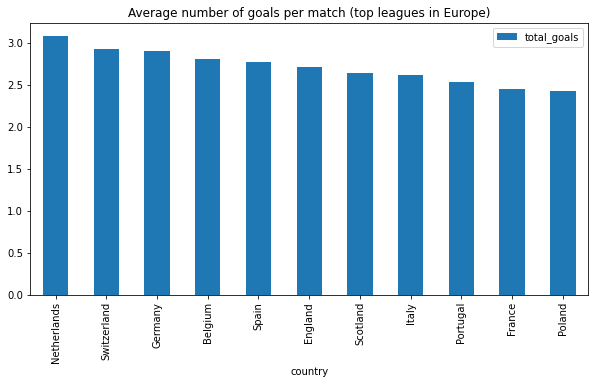

In [16]:
goals_per_country.sort_values('total_goals', ascending=False).plot(
    kind='bar', figsize=(10,5),
    title='Average number of goals per match (top leagues in Europe)'
)

<AxesSubplot:title={'center':'Average number of goals per match (top 2 leagues in Europe)'}, xlabel='country'>

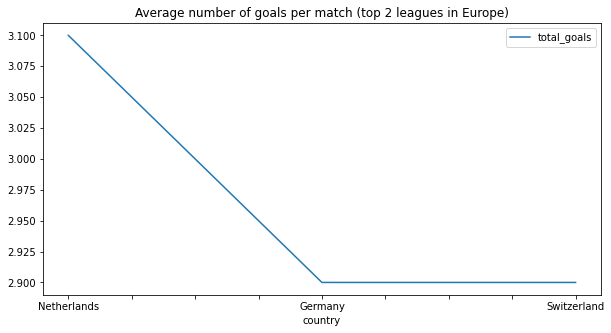

In [33]:
goals_per_country.round(1).nlargest(2, 'total_goals', keep='all').plot(
    kind='line', figsize=(10,5),
    title='Average number of goals per match (top 2 leagues in Europe)'
)